## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Skip Connection

In [3]:
# solution 5: skip-connection

initializer = tf.keras.initializers.RandomNormal()

# create model
inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(inputs)
prev = x

x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)

# skip connection
x = tf.math.add(x, prev)

x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
prev = x

x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)

# skip connection
x = tf.math.add(x, prev)

x = keras.layers.Dense(10)(x)

model = keras.Model(inputs, x)

# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

# 118/118 - 7s - loss: 2.2643 - accuracy: 0.3190 - val_loss: 2.1749 - val_accuracy: 0.4025 - 7s/epoch - 55ms/step


Epoch 1/300
118/118 - 7s - loss: 2.2643 - accuracy: 0.3190 - val_loss: 2.1749 - val_accuracy: 0.4025 - 7s/epoch - 55ms/step
Epoch 2/300
118/118 - 1s - loss: 2.1113 - accuracy: 0.5322 - val_loss: 2.0505 - val_accuracy: 0.5470 - 827ms/epoch - 7ms/step
Epoch 3/300
118/118 - 1s - loss: 1.9832 - accuracy: 0.5891 - val_loss: 1.9203 - val_accuracy: 0.5612 - 772ms/epoch - 7ms/step
Epoch 4/300
118/118 - 1s - loss: 1.8493 - accuracy: 0.6209 - val_loss: 1.7871 - val_accuracy: 0.6296 - 846ms/epoch - 7ms/step
Epoch 5/300
118/118 - 1s - loss: 1.7166 - accuracy: 0.6459 - val_loss: 1.6580 - val_accuracy: 0.6268 - 820ms/epoch - 7ms/step
Epoch 6/300
118/118 - 1s - loss: 1.5914 - accuracy: 0.6615 - val_loss: 1.5399 - val_accuracy: 0.6445 - 840ms/epoch - 7ms/step
Epoch 7/300
118/118 - 1s - loss: 1.4766 - accuracy: 0.6735 - val_loss: 1.4309 - val_accuracy: 0.6707 - 789ms/epoch - 7ms/step
Epoch 8/300
118/118 - 1s - loss: 1.3748 - accuracy: 0.6869 - val_loss: 1.3365 - val_accuracy: 0.6820 - 565ms/epoch - 5ms

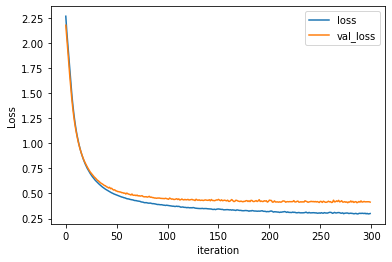

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

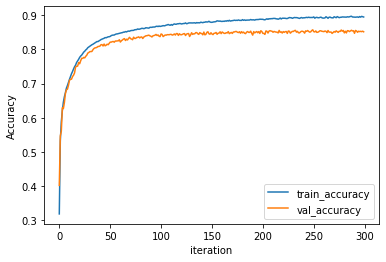

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()